# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

# Create city DataFrames

city_types = pyber_data_df.groupby('type')


#  Total rides counts by city type

total_rides = city_types['ride_id'].count()

# total_rides

In [4]:
# 2. Get the total drivers for each city type

total_drivers = pyber_data_df.groupby(["type", "city"]).mean()['driver_count'].groupby("type").sum()

# total_drivers

In [5]:
#  3. Get the total amount of fares for each city type

total_fare = city_types.sum()['fare']

# total_fare

In [6]:
#  4. Get the average fare per ride for each city type. 

fare_per_ride = total_fare/total_rides

# fare_per_ride

In [7]:
# 5. Get the average fare per driver for each city type. 

fare_per_driver = total_fare/total_drivers

# fare_per_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
      "Total Rides": total_rides,
      "Total Drivers": total_drivers,
      "Total Fare": total_fare,
      "Avg Fare Per Ride": fare_per_ride,
      "Avg Fare Per Driver": fare_per_driver})

# pyber_summary_df 

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)

pyber_summary_df["Avg Fare Per Ride"] = pyber_summary_df["Avg Fare Per Ride"].map("${:,.2f}".format)

pyber_summary_df["Avg Fare Per Driver"] = pyber_summary_df["Avg Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Avg Fare Per Ride,Avg Fare Per Driver
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,1625,2405.0,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

type_date_total_fare = pyber_data_df.groupby(["type", "date"]).sum()['fare']

# type_date_total_fare

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

type_date_total_fare = type_date_total_fare.reset_index()

# type_date_total_fare.head()

In [14]:
# type_date_total_fare.info()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

type_date_pivot = type_date_total_fare.pivot(index="date", columns="type", values="fare")

# type_date_pivot.head(10)

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

dates_jan_apr = type_date_pivot.loc['2019-01-01':'2019-04-29']

# dates_jan_apr.head()

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

dates_jan_apr.index = pd.to_datetime(dates_jan_apr.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()

dates_jan_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_rides_df = dates_jan_apr.resample('W').sum()

# weekly_rides_df.head(10)

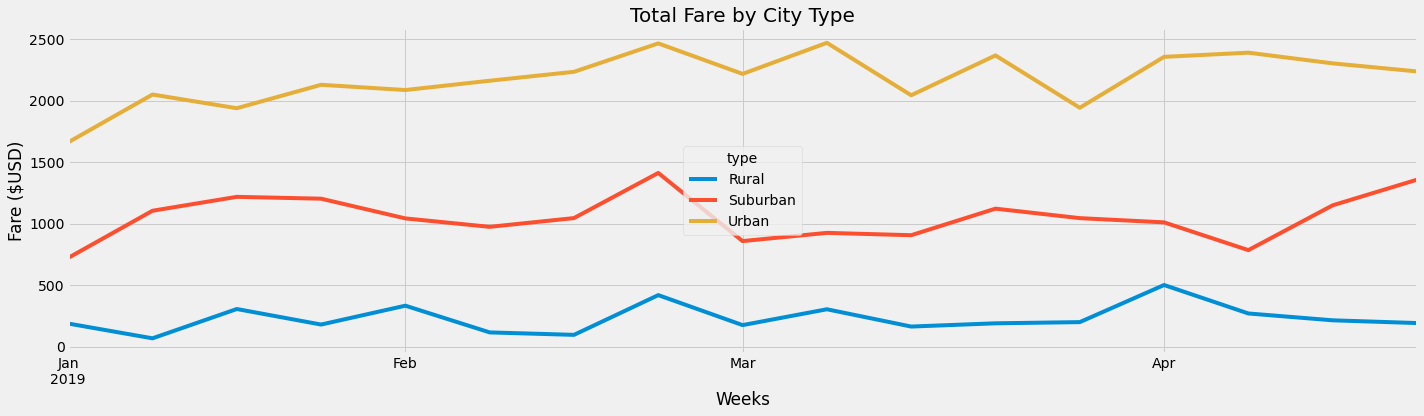

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


# Plot chart
weekly_rides = weekly_rides_df.plot(figsize = (20,6))

# Format
weekly_rides.set_title("Total Fare by City Type",fontsize=20)
weekly_rides.set_xlabel("Weeks")
weekly_rides.set_ylabel("Fare ($USD)")


plt.tight_layout()
# Save chart
plt.savefig("analysis/PyBer_fare_summary.png")

# Show plot
plt.show()